# Biblioteca MatPlotLib

Este tutorial é sobre a utilização da biblioteca MatPlotLib, uma biblioteca utilizada para trabalhar xriar gráficos em python.

Este tutorial foi criado tendo por o tutorial existente na página da bilbioteca maplotlib dispnível em https://matplotlib.org/users/pyplot_tutorial.html.

O primeiro passo para trabalhar com uma biblioteca no Python é importá-la com a utilização do comando import.

In [3]:
import matplotlib as plt

Um gráfico é sempre um elemento com pelo menos duas dimensões.

Na versão mais simples de criação e um gráfico é criar uma lista de pontos e pedir à biblioteca matplotlib para desenhar o gráfico utilizando a instrução plot.

A opção ```python
%matplotlib inline``` 
permite correr os gráficos imediatamente a seguir ao código que indica a sua execução. Se tal opção não for inicada os gráficos aparecerão numa janela ao lado.


In [ ]:
import matplotlib as plt
%matplotlib inline

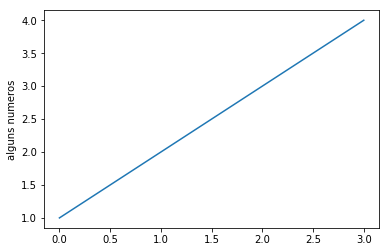

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([1,2,3,4])
plt.ylabel('alguns numeros')
plt.show()

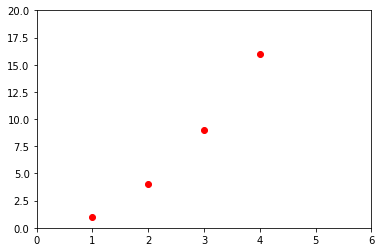

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

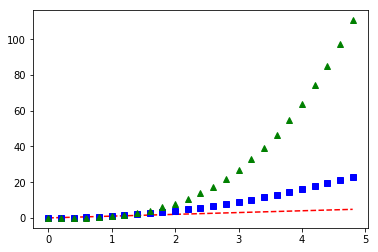

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#amostra com  de 0 a 5 com intervalos de 0.2
t = np.arange(0., 5., 0.2)

#utilizacao de diferentes cores e formatos
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

Conceito de figura e múltiplos gráficos (designados de axis)

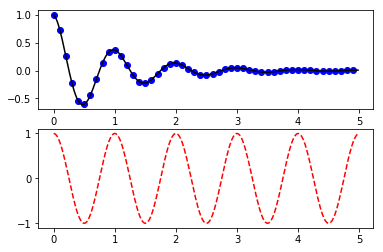

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1) #indicacao da figura
plt.subplot(211) #indicacao do primeiro grafico
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212) #indicacao do segundo grafico
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

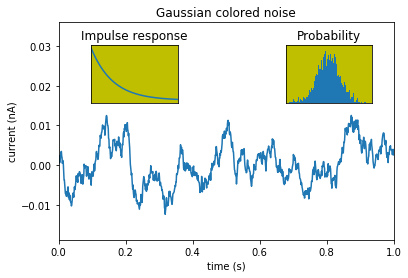

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000]/0.05)               # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)]*dt  # colored noise

# the main axes is subplot(111) by default
plt.plot(t, s)
plt.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s)])
plt.xlabel('time (s)')
plt.ylabel('current (nA)')
plt.title('Gaussian colored noise')

# this is an inset axes over the main axes
a = plt.axes([.65, .6, .2, .2], facecolor='y')
n, bins, patches = plt.hist(s, 400, normed=1)
plt.title('Probability')
plt.xticks([])
plt.yticks([])

# this is another inset axes over the main axes
a = plt.axes([0.2, 0.6, .2, .2], facecolor='y')
plt.plot(t[:len(r)], r)
plt.title('Impulse response')
plt.xlim(0, 0.2)
plt.xticks([])
plt.yticks([])

plt.show()

Trabalhar com texto

Para a escrita de símbolos matemáticos como a média e o desvio padrão no caso abaixo pode utilizar o mesmo formato que se utiliza no latex.

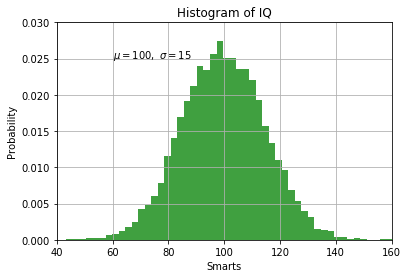

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

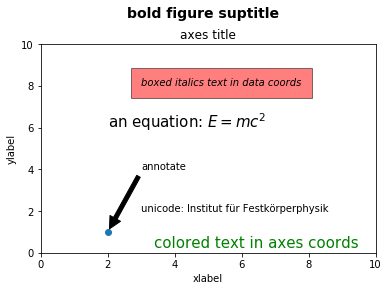

In [11]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, u'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

Trabalhando com eixos logaritmicos e nao lineares

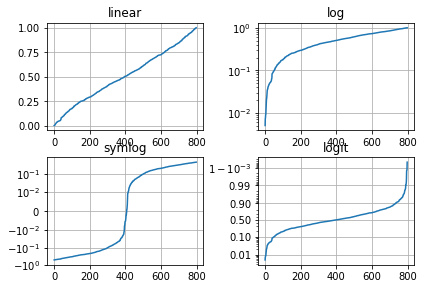

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

Na página da biblioteca estão disponíveis muitos exemplos: https://matplotlib.org/gallery/index.html